------------------------------------------------------------------------------------------------------------------------------------------------

### ML/DL Projekt Gruppe 12:
#### Classification Topic Choice:
Horse - Unicorn 

#### Authors:
- Tim Widholm (86179)
- Emre Tuelue (83128)

#### Team Member Contributions:
Tim Widholm:
- Image Collecting
- Data set Generation and Preprocessing
- Model training
- Model evaluation
- Model testing
- Programming

Emre Tuelue:
- Creation and Preparation of Presentation 

#### Data Collection
Horse data:
- Images of real horses found on the Web
Unicorn data:
- Generated images with Stability AI (DreamStudio) and DALL-E 3 (Bulk Image Generator)
- Images of the Web


#### Use of Generative AI:
- Image Generation (DALL-E 3, Stable Diffusion)
- Model performance improvements, Code improvements (GPT-4o) 

#### Sources:
Code:
- [1] A. Karpathy, "Neural Networks: Zero to Hero," YouTube, Oct. 13, 2022. [Online]. Available: https://www.youtube.com/watch?v=jztwpsIzEGc. [Accessed: Feb. 9, 2025].

Model for Transfer Learning: 
- [2] K. He, X. Zhang, S. Ren, and J. Sun, “Deep Residual Learning for Image Recognition,” in *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR)*, 2016, pp. 770–778. [Online]. Available: https://arxiv.org/abs/1512.03385
- [3] Keras Team, “Keras Applications: ResNet,” Keras Documentation, 2024. [Online]. Available: https://keras.io/api/applications/resnet/. [Accessed: Feb. 9, 2025].

Data Collection:
- [4] Stability AI, "DreamStudio AI - Image Generation Platform," Stability AI, 2025. [Online]. Available: https://beta.dreamstudio.ai/generate. [Accessed: Feb. 9, 2025].
- [5] Bulk Image Generation, "Bulk Image Generation - AI Image Generator," 2025. [Online]. Available: https://bulkimagegeneration.com. [Accessed: Feb. 9, 2025].

Generative AI:
- [6] OpenAI, "Hello GPT-4o," 2024. [Online]. Available: https://openai.com/index/hello-gpt-4o/. [Accessed: Feb. 9, 2025].
- [7] OpenAI, "DALL·E 3," 2025. [Online]. Available: https://openai.com/index/dall-e-3/. [Accessed: Feb. 9, 2025].
- [8] Stability AI, "StableStudio: Open Source Community-Driven Future of DreamStudio," 2025. [Online]. Available:    https:stabilityainewsstablestudio-open-source-community-driven-future-dreamstudio-release. [Accessed: Feb. 9, 2025].

Packages/Libs:
- tensorflow
- opencv-python
- matplotlib
- numpy
- scikit-learn
- seaborn
- ipykernel

Frameworks:
- Anaconda 3, Python v3.12.7, pip v24.2
- Jupyter Lab/ Notebook
- VS Code Jupyter Extension
- Visual Studio 2019 C/C++ Build Tools

--------------------------------------------------------------------------------------------------

#### Table of Contents:
##### 1. General Code for both Models
##### 1.1 Data Selection

##### 2. pre-trained Model with Transfer Learning
##### 2.1 Imports
##### 2.2 Data Preprocessing
##### 2.3 Model
###### 2.3.1 Model Callbacks
###### 2.3.2 Model Structure and Configuration
###### 2.3.3 Model Training
##### 2.4 Fine-Tuning
###### 2.4.1 Fine-Tuning Callbacks
###### 2.4.2 Fine-Tuning Model Structure and Configuration
###### 2.4.3 Fine-Tuning Process
##### 2.5 Model Evaluation
##### 2.6 Model Saving

##### 3. own Model
##### 3.1 Imports
##### 3.2 Data Preprocessing
##### 3.3 Base Model
###### 3.3.1 Base Model Data Preprocessing
###### 3.3.2 Base Model Callbacks
###### 3.3.3 Base Model Structure and Configuration
###### 3.3.4 Base Model Training
##### 3.4 Fine-Tuning
###### 3.4.1 Fine-Tuning Model Data Preprocessing
###### 3.4.2 Fine-Tuning Model Callbacks
###### 3.4.3 Fine-Tuning Model Structure and Configuration
###### 3.4.4 Fine-Tuning Model Trainin

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. General Code for both Models

----------------------------------------------------------------------------------------------

1.1 Data Selection

In [1]:
import os
from pathlib import Path
import imghdr
import cv2

C:\Users\Tim\AppData\Local\Temp\ipykernel_12548\1646803705.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'

In [3]:
# [1]
image_exts = ['jpeg','jpg','bmp','png']

In [4]:
# Removes all images that do not meet the selected file endings [1]
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))



In [5]:
# Removes all images that do not meet the selected file endings [1]
base_path = Path(data_dir)
allowed_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

for file in base_path.rglob('*'):
    if file.is_file() and file.suffix.lower() not in allowed_extensions:
        print(f"Remove unsupported files: {file}")
        file.unlink()  

In [6]:
# Removes all images that aren't encoded in UTF-8 [1]
base_path = 'data'
for root, dirs, files in os.walk(base_path):
    for name in dirs + files:
        try:
            print(os.path.join(root, name))
        except UnicodeEncodeError as e:
            print(f"Error with file: {name} - {e}")

data\horse
data\unicorn
data\horse\-braunes-pferd-freigestellt_17835475_high.jpg
data\horse\-braunes-pferd_02042207_high.jpg
data\horse\-pferd-im-stall_11158540_high.jpg
data\horse\-pferd-im-stall_11158542_high.jpg
data\horse\-pferd-im-stall_31663436_high.jpg
data\horse\-schwarzes-pferd-auf-der-wiese_12930606_high.jpg
data\horse\-schwarzes-pferd-mit-flamme_12930610_high.jpg
data\horse\-schwarzes-pferd-wasser-diy.jpg
data\horse\000044-Ardenner-Kaltblut.jpg
data\horse\000128-Maehne-beim-Pferd-842x474.jpg
data\horse\000mustang-duze.jpeg
data\horse\002-American-Quarter-Horse-Rasseportrait-Grullo-Mausfalbe.jpg
data\horse\002_Schwarzwaelder-Kaltblut.jpg
data\horse\01_39_Del_Arko_d_Henvet-Lancer_lll-05627-5795fe773d5f0044.jpg
data\horse\02_Pferd_hustend_Arnd_Bronkhorst_JPEG_MITTEL.jpg
data\horse\05-07--1150x600-1654615381.jpg
data\horse\0546b59a-0530-49b9-a34e-6f4ccfc06ebe.jpg
data\horse\05a5d68992ce61d0f270a408e80251a3.jpg
data\horse\09-03-21Fili-von-Anja-1024x768.jpg
data\horse\0bbb59134a9a

In [7]:
# Encodes all file-names that aren't UTF-8 into UTF-8 [1]
base_path = 'data'
for root, dirs, files in os.walk(base_path):
    for name in dirs + files:
        try:
            full_path = os.path.join(root, name)
            full_path.encode('utf-8')  
        except UnicodeEncodeError as e:
            print(f"Problematic path: {full_path} - {e}")

In [8]:
# Replaces all whitespaces in file-names [1]
base_path = 'data'
counter = 0
for root, dirs, files in os.walk(base_path):
    for file_name in files:
        counter=counter+1
        new_name = file_name.replace("(", "").replace(")", "").replace(" ", f'_{counter}')
       
        old_file = os.path.join(root, file_name)
        new_file = os.path.join(root, new_name)
        os.rename(old_file, new_file)
        print(f"Renamed: {old_file} → {new_file}")

Renamed: data\horse\-braunes-pferd-freigestellt_17835475_high.jpg → data\horse\-braunes-pferd-freigestellt_17835475_high.jpg
Renamed: data\horse\-braunes-pferd_02042207_high.jpg → data\horse\-braunes-pferd_02042207_high.jpg
Renamed: data\horse\-pferd-im-stall_11158540_high.jpg → data\horse\-pferd-im-stall_11158540_high.jpg
Renamed: data\horse\-pferd-im-stall_11158542_high.jpg → data\horse\-pferd-im-stall_11158542_high.jpg
Renamed: data\horse\-pferd-im-stall_31663436_high.jpg → data\horse\-pferd-im-stall_31663436_high.jpg
Renamed: data\horse\-schwarzes-pferd-auf-der-wiese_12930606_high.jpg → data\horse\-schwarzes-pferd-auf-der-wiese_12930606_high.jpg
Renamed: data\horse\-schwarzes-pferd-mit-flamme_12930610_high.jpg → data\horse\-schwarzes-pferd-mit-flamme_12930610_high.jpg
Renamed: data\horse\-schwarzes-pferd-wasser-diy.jpg → data\horse\-schwarzes-pferd-wasser-diy.jpg
Renamed: data\horse\000044-Ardenner-Kaltblut.jpg → data\horse\000044-Ardenner-Kaltblut.jpg
Renamed: data\horse\000128-Ma

In [9]:
# Deletes all chars in file-names that aren't ASCII and replaces them [1]
base_path = data_dir

for root, dirs, files in os.walk(base_path):
    for name in dirs + files:
        new_name = name.encode('ascii', errors='ignore').decode('ascii')  
        old_path = os.path.join(root, name)
        new_path = os.path.join(root, new_name)
        os.rename(old_path, new_path)
        print(f"Renamed: {old_path} → {new_path}")

Renamed: data\horse → data\horse
Renamed: data\unicorn → data\unicorn
Renamed: data\horse\-braunes-pferd-freigestellt_17835475_high.jpg → data\horse\-braunes-pferd-freigestellt_17835475_high.jpg
Renamed: data\horse\-braunes-pferd_02042207_high.jpg → data\horse\-braunes-pferd_02042207_high.jpg
Renamed: data\horse\-pferd-im-stall_11158540_high.jpg → data\horse\-pferd-im-stall_11158540_high.jpg
Renamed: data\horse\-pferd-im-stall_11158542_high.jpg → data\horse\-pferd-im-stall_11158542_high.jpg
Renamed: data\horse\-pferd-im-stall_31663436_high.jpg → data\horse\-pferd-im-stall_31663436_high.jpg
Renamed: data\horse\-schwarzes-pferd-auf-der-wiese_12930606_high.jpg → data\horse\-schwarzes-pferd-auf-der-wiese_12930606_high.jpg
Renamed: data\horse\-schwarzes-pferd-mit-flamme_12930610_high.jpg → data\horse\-schwarzes-pferd-mit-flamme_12930610_high.jpg
Renamed: data\horse\-schwarzes-pferd-wasser-diy.jpg → data\horse\-schwarzes-pferd-wasser-diy.jpg
Renamed: data\horse\000044-Ardenner-Kaltblut.jpg →

In [10]:
# Counts each folder of images of the two classes [1]

base_path = data_dir

folders = ['horse', 'unicorn']

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        num_files = sum([len(files) for _, _, files in os.walk(folder_path)])
        print(f"Number of files in '{folder}': {num_files}")
    else:
        print(f"Folder '{folder}' doesn't exist.")

Number of files in 'horse': 1788
Number of files in 'unicorn': 1946


---------------------------------------------------------------------------------------------------------------

### 2. Modell 1: Pre-trained Model with Transfer Learning

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2.1 Imports

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

import os
import shutil
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
import seaborn as sns


2.2 Data Preprocessing

In [12]:
# Gets all necessary paths
original_data_dir = "data"
base_dir = "split_data_model_1"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [13]:
# Function for automatic and customized data split
def split_data(data_dir, train_dir, val_dir, test_dir, split_ratio=(0.5, 0.25, 0.25)):
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)
    os.makedirs(train_dir)
    os.makedirs(val_dir)
    os.makedirs(test_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        train_images, temp_images = train_test_split(images, test_size=split_ratio[1] + split_ratio[2], random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=split_ratio[2] / (split_ratio[1] + split_ratio[2]), random_state=42)

        for split, split_dir in zip([train_images, val_images, test_images], [train_dir, val_dir, test_dir]):
            class_split_dir = os.path.join(split_dir, class_name)
            os.makedirs(class_split_dir)
            for image in split:
                shutil.copy(os.path.join(class_path, image), os.path.join(class_split_dir, image))
                
split_data(original_data_dir, train_dir, val_dir, test_dir)

In [14]:
# Counting train data, validation data and test data
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

print("Trainingsdaten:", count_images(train_dir))
print("Validierungsdaten:", count_images(val_dir))
print("Testdaten:", count_images(test_dir))

Trainingsdaten: {'horse': 894, 'unicorn': 973}
Validierungsdaten: {'horse': 447, 'unicorn': 486}
Testdaten: {'horse': 447, 'unicorn': 487}


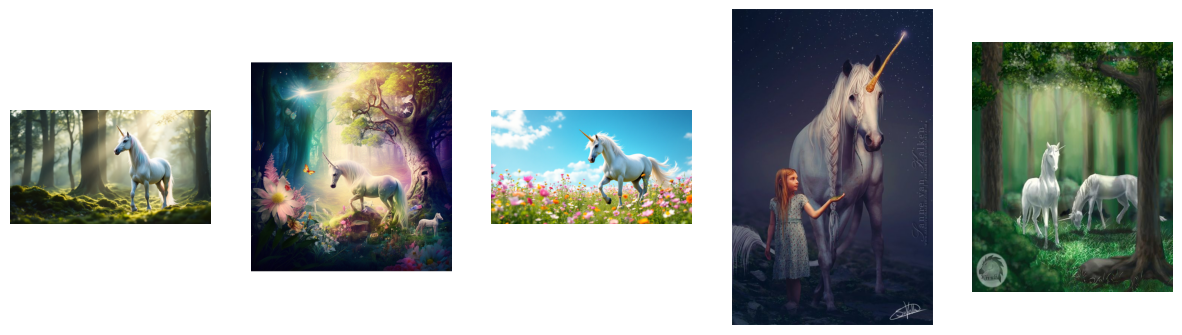

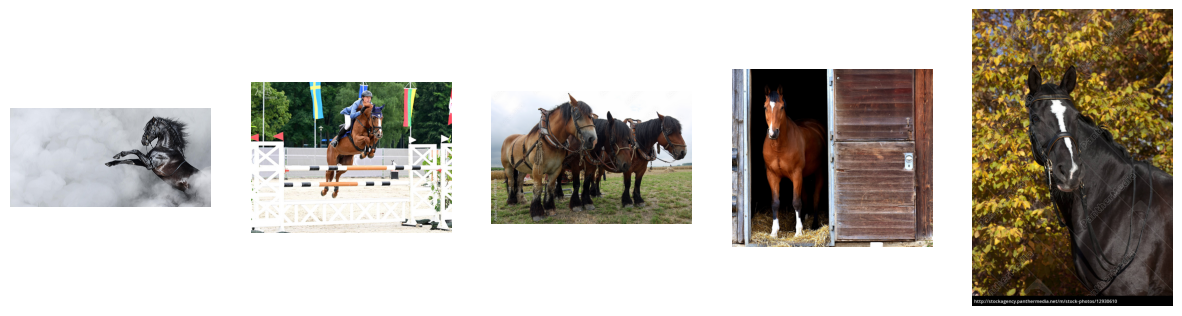

In [15]:
# Function that shows random images to verify correct class labels
def show_random_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    image_files = random.sample(os.listdir(class_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.show()

# Show 5 random unicorn images
show_random_images(train_dir, "unicorn")

# Show 5 random horse images
show_random_images(train_dir, "horse")

In [16]:
# Integrate Data Augmentation for improved learning and training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]  
)
# No Data augmentation for val_data, only rescaling
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [17]:
# Data preparation and generation
# Batch size of 16 shows to be the optimum in this case
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 1867 images belonging to 2 classes.
Found 933 images belonging to 2 classes.


2.3 Model

2.3.1 Model Callbacks

In [18]:
# Set Callbacks used for training
# Early Stopping stops training process when the val_loss doesn't decrease after 10 epochs 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce Learning Rate reduces learning rate to 50% when the val_loss doesn't change in 4 epochs
# Limit of reduction is 4e-6
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=4, min_lr=4e-6 )

In [19]:
# Set custom callback: Training stops when certain loss is achieved (here 0.2)
class CustomStop(Callback):
    def __init__(self, target_loss = 0.2):
        super(CustomStop, self).__init__()
        self.target_loss = target_loss
    def on_epoch_end(self, epoch, logs = None):
        if logs.get("loss") and logs["loss"] < self.target_loss:
            print(f"\n Stopping training: Loss {logs['loss']:.4f} reached target {self.target_loss:.4f}!")
            self.model.stop_training=True

custom_stop = CustomStop(target_loss=0.2)

In [20]:
# Get Class weights to ensure balanced training
# In our training we had almost no difference in dataset size of the two classes, so class weights weren't essential

# Counting Classes
class_counts = count_images(train_dir)
classes = np.array(list(class_counts.keys()))
class_weights = compute_class_weight("balanced", classes=np.arange(len(classes)), y=np.hstack([np.ones(v) * i for i, v in enumerate(class_counts.values())]))

# Dictionary for Model-Training
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

2.3.2 Model Structure and Configuration

In [21]:
# Loading pre-trained model (ResNet50) [2],[3]
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [22]:
# Freeze base model to only train the added layers
base_model.trainable = False

In [23]:
# Transfer-Learning-Modell erstellen
# Dropout to improve stability of loss and decrease the chance of overfitting
# Batch Normalization also helps against overfitting
# GlobalAveragePooling calculates Average values of the base model feature map
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


In [24]:
base_model.trainable = False

In [25]:
# Compile Model
# Learning rate of 0.001 was the optimum in our case to start with
# Using optimizer Adam
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Plotting model architecture (WARNING: Very Large)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,859,073 (91.02 MB)

 Trainable params: 270,977 (1.03 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

2.3.3 Model Training

In [27]:
# Training with 50 epochs
# Training stops at epoch 42 because of Early Stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr,custom_stop,early_stopping]
)

c:\Users\Tim\ML_DL_Projects\ML_DL_Project_Submission\icsub\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 99s 791ms/step - accuracy: 0.5836 - loss: 0.8250 - val_accuracy: 0.5209 - val_loss: 0.8383 - learning_rate: 0.0010
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 96s 825ms/step - accuracy: 0.6041 - loss: 0.7348 - val_accuracy: 0.5541 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 93s 790ms/step - accuracy: 0.6082 - loss: 0.7297 - val_accuracy: 0.4845 - val_loss: 0.7347 - learning_rate: 0.0010
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 91s 779ms/step - accuracy: 0.6003 - loss: 0.7066 - val_accuracy: 0.5552 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 95s 811ms/step - accuracy: 0.6342 - loss: 0.6800 - val_accuracy: 0.5338 - val_loss: 1.5006 - learning_rate: 0.0010
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 92s 783ms/step - accuracy: 0.6171 - loss: 0.6702 - val_accuracy: 0.6538 - val_loss: 0.6375 - learning_rate: 0.0010
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 91s 775ms/step - accuracy: 0.6

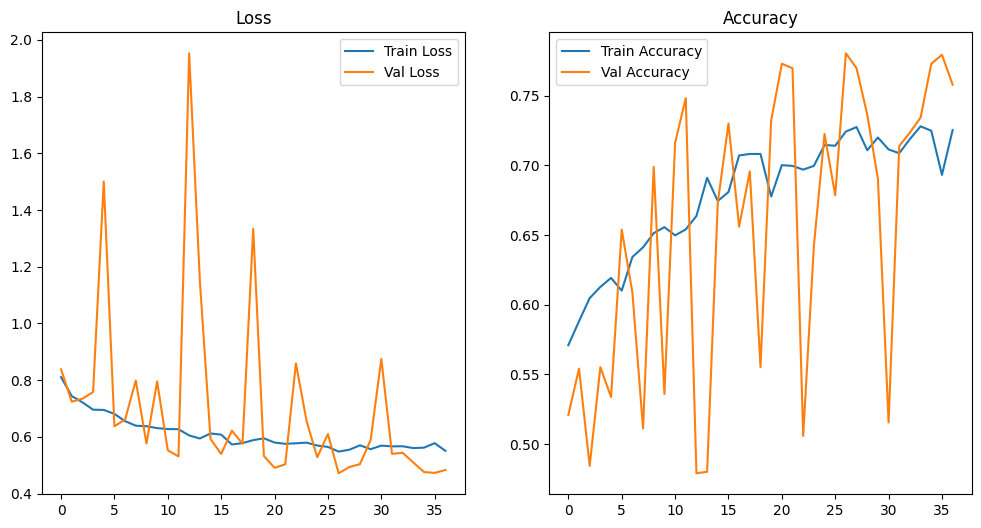

In [28]:
# Plotting of loss and accuracy 

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Val Loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

2.4 Fine-Tuning Model

2.4.1 Fine-Tuning Callbacks

In [29]:
# ReduceLROnPlateau for fine-tuning
reduce_lr_fine = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,  
    min_lr=4e-6 
)


2.4.2 Fine-Tuning Model Structure and Configuration

In [30]:
# Activate base model for fine-tuning
base_model.trainable = True

In [31]:
# Only train the last 50 layers
for layer in base_model.layers[-50:]:  
    layer.trainable = True

In [32]:
# Compile Model for fine-tuning with learning rate 0.00005 
# Small learning rate ensures stable weight updates and improves error decrease
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2.4.3 Fine-Tuning Process

In [33]:
# Fine-Tuning Training with 70 epochs
# Training stops at 59 epochs due to Early stopping
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=70,
    callbacks=[early_stopping, reduce_lr_fine]
)

Epoch 1/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.5695 - loss: 0.7495 - val_accuracy: 0.4791 - val_loss: 1.1944 - learning_rate: 1.0000e-05
Epoch 2/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.8836 - loss: 0.3875 - val_accuracy: 0.4791 - val_loss: 0.9046 - learning_rate: 1.0000e-05
Epoch 3/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9035 - loss: 0.3506 - val_accuracy: 0.4887 - val_loss: 0.7250 - learning_rate: 1.0000e-05
Epoch 4/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9271 - loss: 0.3019 - val_accuracy: 0.6324 - val_loss: 0.6219 - learning_rate: 1.0000e-05
Epoch 5/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9214 - loss: 0.2913 - val_accuracy: 0.7985 - val_loss: 0.4689 - learning_rate: 1.0000e-05
Epoch 6/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9318 - loss: 0.2774 - val_accuracy: 0.9025 - val_loss: 0.3087 - learning_rate: 1.0000e-05
Epoch 7/70
117/117 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - acc

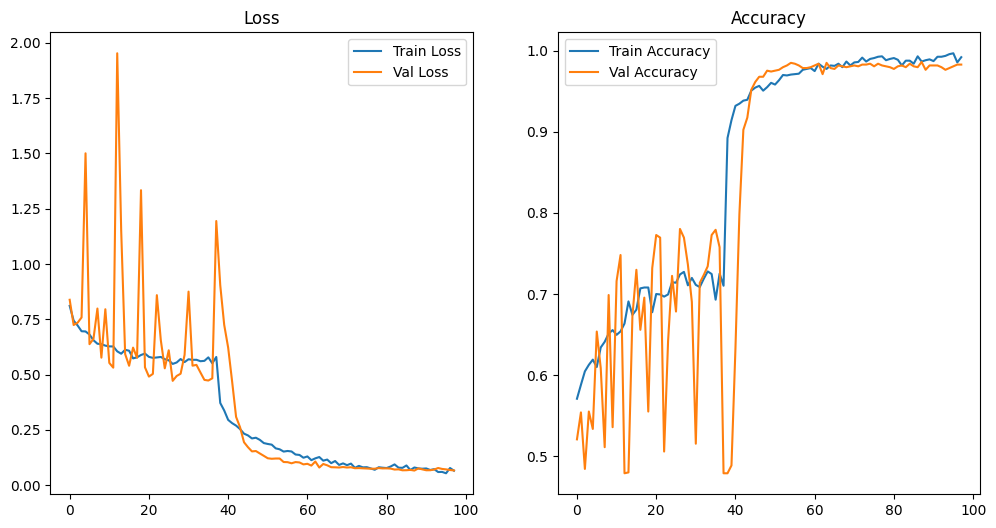

In [34]:
# Fine-Tuning + Training Results plotting
# plotting loss and accuracy

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
ax[0].set_title('Loss')
ax[0].legend()


ax[1].plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()


2.5 Model Evaluation

Found 934 images belonging to 2 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 977ms/step


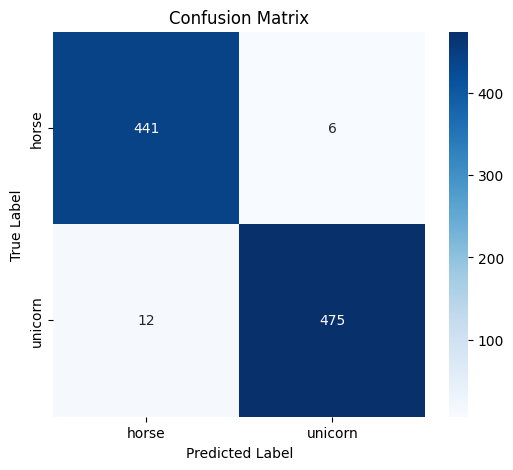

              precision    recall  f1-score   support

       horse       0.97      0.99      0.98       447
     unicorn       0.99      0.98      0.98       487

    accuracy                           0.98       934
   macro avg       0.98      0.98      0.98       934
weighted avg       0.98      0.98      0.98       934



In [35]:
# Load Test data
# No shuffle so that the order of the predictions matches the labels. 
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

# Predictions for test set
# Threshold at 0.5 for binary classification
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int").flatten()  
true_classes = test_generator.classes  
class_labels = list(test_generator.class_indices.keys()) 

# Create Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [36]:
# Load image for operation mode test
img_path = "./testdata/test_horse.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

In [37]:
# Prediction
prediction = model.predict(img_array)
class_label = "unicorn" if prediction[0] > 0.5 else "horse"
print(f"Das Modell sagt: {class_label} mit Wahrscheinlichkeit {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Das Modell sagt: horse mit Wahrscheinlichkeit 0.02


2.6 Saving Model

In [38]:
model_1_name = 'ML_DL_Gruppe_12_Model_1'

In [39]:
# Saving as .h5-file
model.save(os.path.join('models',f'{model_1_name}.h5'))

In [40]:
# Saving as .keras-file
model.save(os.path.join('models',f'{model_1_name}.keras'))

In [41]:
model = None

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Modell 2: own Model 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3.1 Imports

In [42]:

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout,Input, BatchNormalization,LeakyReLU,GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

import os
import imghdr
import shutil
import cv2
import shutil
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

3.2 Data Preprocessing

In [43]:
# Gets all necessary paths
original_data_dir = "data"
base_dir = "split_data_model_2"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [44]:
# Function for automatic and customized split
def split_data(data_dir, train_dir, val_dir, test_dir, split_ratio=(0.5, 0.25, 0.25)):
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)
    os.makedirs(train_dir)
    os.makedirs(val_dir)
    os.makedirs(test_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        train_images, temp_images = train_test_split(images, test_size=split_ratio[1] + split_ratio[2], random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=split_ratio[2] / (split_ratio[1] + split_ratio[2]), random_state=42)

        for split, split_dir in zip([train_images, val_images, test_images], [train_dir, val_dir, test_dir]):
            class_split_dir = os.path.join(split_dir, class_name)
            os.makedirs(class_split_dir)
            for image in split:
                shutil.copy(os.path.join(class_path, image), os.path.join(class_split_dir, image))

split_data(original_data_dir, train_dir, val_dir, test_dir)

In [45]:
# Counting train data, validation data and test data
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

print("Trainingsdaten:", count_images(train_dir))
print("Validierungsdaten:", count_images(val_dir))
print("Testdaten:", count_images(test_dir))

Trainingsdaten: {'horse': 894, 'unicorn': 973}
Validierungsdaten: {'horse': 447, 'unicorn': 486}
Testdaten: {'horse': 447, 'unicorn': 487}


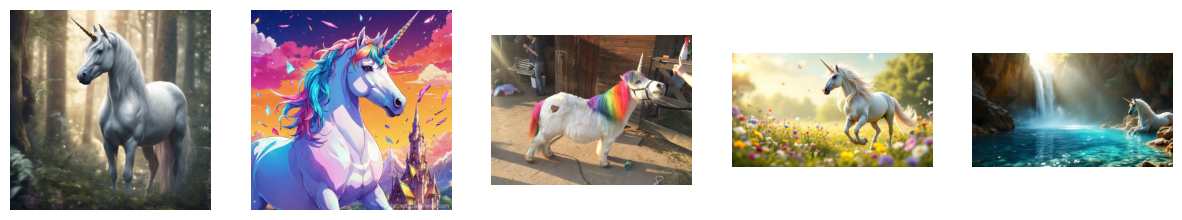

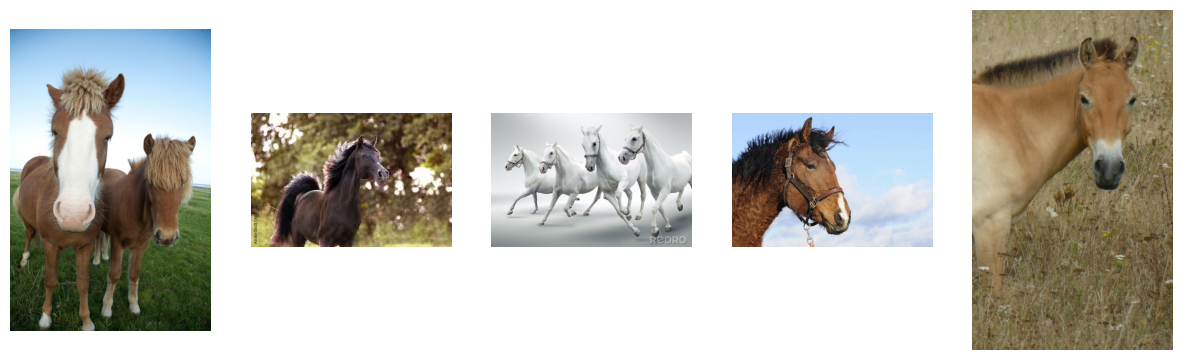

In [46]:
# Function that shows random images to verify correct class labels
def show_random_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    image_files = random.sample(os.listdir(class_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.show()

# Show an example set of images to check correctness of class labels
# Show 5 random unicorn images
show_random_images(train_dir, "unicorn")

# Show 5 random horse images 
show_random_images(train_dir, "horse")

3.3 Base Model 

3.3.1 Base Model Data Preprocessing

In [47]:
# Data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=25,  
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],  
    channel_shift_range=20.0,  
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [48]:
# Prepare and generate Data
# Batch size of 16 proofs to be the optimum in this case
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 1867 images belonging to 2 classes.
Found 933 images belonging to 2 classes.


In [49]:
# Data Augmentation directly integrated in Model architecture
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),  
    RandomRotation(0.3), 
    RandomZoom(0.3),  
    RandomContrast(0.3), 
])

3.3.2 Base Model Callbacks

In [50]:
# Function for gradually decreasing the learning rate
# Sets/ schedules the exact epoch where learning rate gets decreased
def scheduler(epoch, lr):
    if epoch < 5:
        return 5e-3  
    elif epoch < 10:
        return 1e-3 
    elif epoch < 15:
        return 5e-4 

    elif epoch < 25:  
        return 1e-4  
    elif epoch < 35:
        return 5e-5 
    else:
        return 2e-5  

lr_callback = LearningRateScheduler(scheduler)

In [51]:
# Gets the tensorboard callback [1]
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
# This callback decreases the learning rate when the val_loss doesn't change after 3 epochs 
# Each function call decreases the learning rate to 50% 
# Learning rate decreases down to 1e-6
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,         
    patience=3,         
    min_lr=1e-6         
)

In [53]:
# CustomStop callback automatically stops training when loss equals 0.2
class CustomStop(Callback):
    def __init__(self, target_loss = 0.2):
        super(CustomStop, self).__init__()
        self.target_loss = target_loss
    def on_epoch_end(self, epoch, logs = None):
        if logs.get("loss") and logs["loss"] < self.target_loss:
            print(f"\n Stopping training: Loss {logs['loss']:.4f} reached target {self.target_loss:.4f}!")
            self.model.stop_training=True
            
custom_stop = CustomStop(target_loss=0.2)

In [54]:
# Early Stopping Callback stops training when val_loss doesn't change after 5 epochs
# Loads best weights after training is finished/ stopped
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True  
)

In [55]:
# Class weights to improve training when data set is unbalanced
class_counts = count_images(train_dir)
classes = np.array(list(class_counts.keys()))
class_weights = compute_class_weight("balanced", classes=np.arange(len(classes)), y=np.hstack([np.ones(v) * i for i, v in enumerate(class_counts.values())]))

# Dictionary for Model-Training
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

3.3.3 Base Model Initializing and Structure Configuration

In [79]:
# Load Sequential Model
model = Sequential()

In [80]:
# Create Model Architecture [1]
# Dropout increases by each layer to have stable weight changes and minimize overfitting
# Batch Normalization also helps against overfitting, chance of exploding gradients and accelerates training
# LeakyReLU is better for Backpropagation
# Ridge Regularization (l2) helps against overfitting and stabilizes training process


# Input Layer
# Data Augmentation as first layer
model.add(data_augmentation)

# Convolutional Block 1

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# Global Pooling
model.add(GlobalAveragePooling2D())


# First Dense layer
model.add(Dense(512, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

# Second Dense layer
model.add(Dense(256, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.7))

# Third Dense layer
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))  

# Fourth Dense layer
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

c:\Users\Tim\ML_DL_Projects\ML_DL_Project_Submission\icsub\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Tim\ML_DL_Projects\ML_DL_Project_Submission\icsub\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [81]:
# Compile model with Adam optimizer at learning rate 0.001
# Loss function is binary crossentropy
model.compile(optimizer=Adam(learning_rate=0.005),  
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [85]:
# Plotting of model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

3.3.4 Base Model Training

In [60]:
# Training the model with 60 epochs 
hist = model.fit(train_generator,epochs=60,validation_data=val_generator,class_weight=class_weights_dict,callbacks=[reduce_lr, tensorboard_callback,early_stopping,lr_callback])

c:\Users\Tim\ML_DL_Projects\ML_DL_Project_Submission\icsub\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 101s 810ms/step - accuracy: 0.5538 - loss: 9.4164 - val_accuracy: 0.5316 - val_loss: 4.1887 - learning_rate: 0.0050
Epoch 2/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 800ms/step - accuracy: 0.6694 - loss: 3.3121 - val_accuracy: 0.7406 - val_loss: 1.7476 - learning_rate: 0.0050
Epoch 3/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 802ms/step - accuracy: 0.7186 - loss: 1.5004 - val_accuracy: 0.5070 - val_loss: 1.3154 - learning_rate: 0.0050
Epoch 4/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 801ms/step - accuracy: 0.7374 - loss: 1.1184 - val_accuracy: 0.7160 - val_loss: 1.1692 - learning_rate: 0.0050
Epoch 5/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 801ms/step - accuracy: 0.7364 - loss: 1.1241 - val_accuracy: 0.8028 - val_loss: 0.9651 - learning_rate: 0.0050
Epoch 6/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 804ms/step - accuracy: 0.7728 - loss: 0.9088 - val_accuracy: 0.8103 - val_loss: 0.7786 - learning_rate: 0.0010
Epoch 7/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 94s 804ms/step - accuracy: 0.

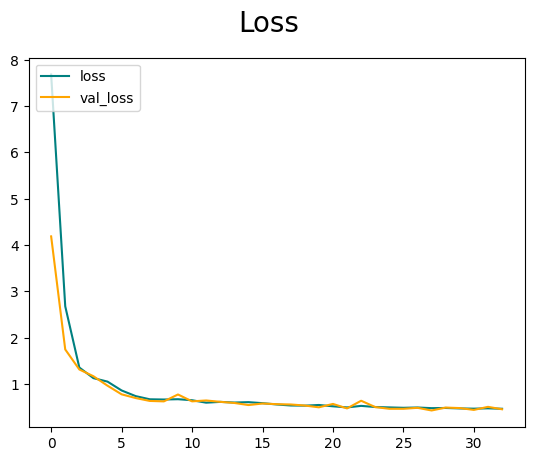

In [61]:
# Plotting the loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

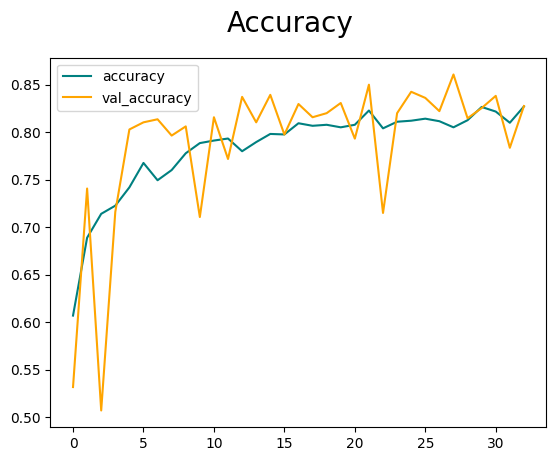

In [62]:
# Plotting the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

3.4 Fine-Tuning Model

3.4.1 Fine-Tuning Data Preprocessing

In [63]:
# Weaker Data augmentation for fine-tuning 
fine_tune_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,
    shear_range=0.1,  
    zoom_range=0.1, 
    horizontal_flip=True, 
    brightness_range=[0.9, 1.1],  
    channel_shift_range=10.0,  
    fill_mode='nearest'
)

# Create fine-tune training data generator
# Batch size of 8 
fine_tune_generator = fine_tune_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary'
)

Found 1867 images belonging to 2 classes.


In [64]:
# No data augmentation for val_data, only rescaling
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create Fine-Tuning val data generator
# Batch size of 8
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

Found 933 images belonging to 2 classes.


In [65]:
# Data augmentation directly integrated in model architecture for fine-tuning
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.05),  
    RandomZoom(0.1),  
    RandomContrast(0.1),  
])

3.4.2 Fine-Tuning Callbacks

In [66]:
# Learning rate schedule for fine-tuning
def fine_tune_scheduler(epoch, lr):
    if epoch < 10:
        return 5e-5  
    elif epoch < 20:
        return 2e-5 
    else:
        return 1e-5 

fine_tune_callback = LearningRateScheduler(fine_tune_scheduler)

3.4.3 Fine-Tuning Model Structure 

In [67]:
# Freeze all convolutional and pooling layers and only train 8 dense layers
for layer in model.layers[:-8]: 
    layer.trainable = False

# Compile model again with momentum optimization of 0.9 
# Start with learning rate 1e-5
# Using optimizer SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

3.4.4 Fine-Tuning Process

In [68]:
# Start Fine-Tuning Training with 20 epochs
fine_tune_hist = model.fit(
    fine_tune_generator,
    epochs=20,  
    validation_data=val_generator,
    callbacks=[fine_tune_callback]
)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.8327 - loss: 0.3944 - val_accuracy: 0.8296 - val_loss: 0.4126 - learning_rate: 5.0000e-05
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 53s 225ms/step - accuracy: 0.8179 - loss: 0.4271 - val_accuracy: 0.8285 - val_loss: 0.4186 - learning_rate: 5.0000e-05
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 52s 224ms/step - accuracy: 0.8160 - loss: 0.4232 - val_accuracy: 0.8242 - val_loss: 0.4202 - learning_rate: 5.0000e-05
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 52s 224ms/step - accuracy: 0.8366 - loss: 0.3930 - val_accuracy: 0.8242 - val_loss: 0.4201 - learning_rate: 5.0000e-05
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 53s 225ms/step - accuracy: 0.8415 - loss: 0.3897 - val_accuracy: 0.8199 - val_loss: 0.4276 - learning_rate: 5.0000e-05
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 53s 225ms/step - accuracy: 0.8226 - loss: 0.4121 - val_accuracy: 0.8242 - val_loss: 0.4168 - learning_rate: 5.0000e-05
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 52s 22

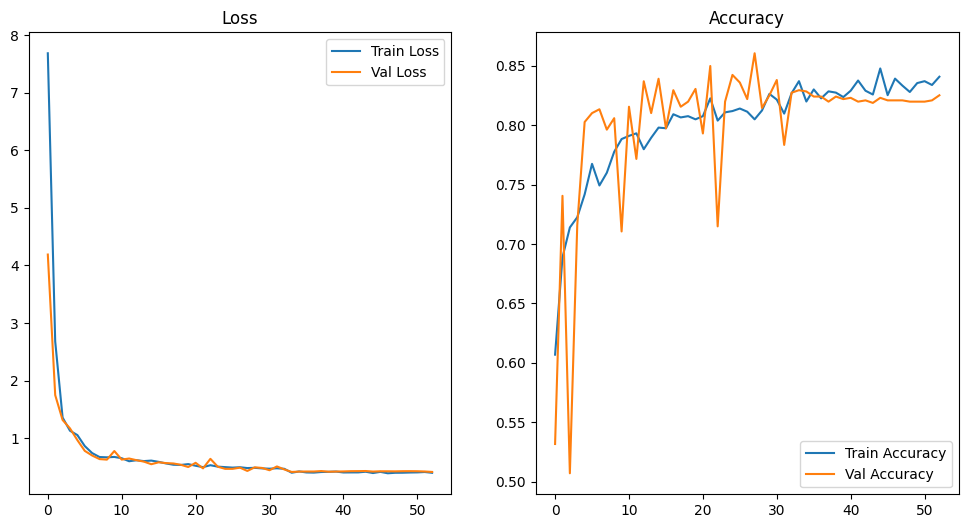

In [69]:
# Plotting accuracy and loss of fine-tuning + base model training
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(hist.history['loss'] + fine_tune_hist.history['loss'], label='Train Loss')
ax[0].plot(hist.history['val_loss'] + fine_tune_hist.history['val_loss'], label='Val Loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(hist.history['accuracy'] + fine_tune_hist.history['accuracy'], label='Train Accuracy')
ax[1].plot(hist.history['val_accuracy'] + fine_tune_hist.history['val_accuracy'], label='Val Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

3.5 Evaluation of Model

Found 934 images belonging to 2 classes.
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step


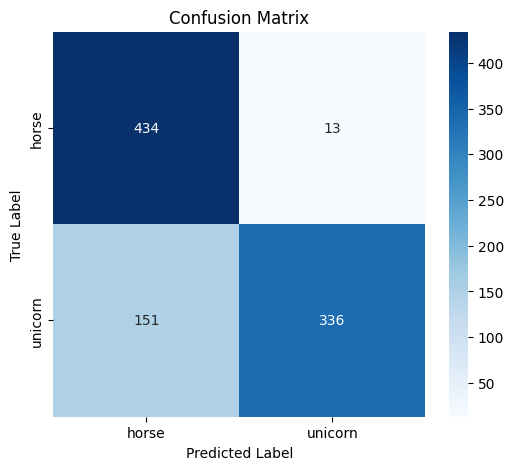

              precision    recall  f1-score   support

       horse       0.74      0.97      0.84       447
     unicorn       0.96      0.69      0.80       487

    accuracy                           0.82       934
   macro avg       0.85      0.83      0.82       934
weighted avg       0.86      0.82      0.82       934



In [70]:
# Load and generate test data
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

# Get predictions of test data
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int").flatten()  
true_classes = test_generator.classes 
class_labels = list(test_generator.class_indices.keys())  

# Calculate Confusion Matrix berechnen
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate metrics (Precision, Recall, F1-Score)
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [71]:
# Load unseen Image for personal test
img_path = "./testdata/test_horse.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

In [72]:
# Get predictions of personal test
prediction = model.predict(img_array)
class_label = "unicorn" if prediction[0] > 0.5 else "horse"
print(f"Das Modell sagt: {class_label} mit Wahrscheinlichkeit {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Das Modell sagt: horse mit Wahrscheinlichkeit 0.09


3.6 Saving Model

In [73]:
model_2_name = 'ML_DL_Gruppe_12_Model_2'

In [74]:
# Save Model as .h5-file
model.save(os.path.join('models',f'{model_2_name}.h5'))

In [75]:
# Save Model as .keras-file
model.save(os.path.join('models',f'{model_2_name}.keras'))

In [76]:
model = None